# Python Numerical Tools

（Mostly copied from "10 Minutes to pandas": 
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

## 3. pandas

In [8]:
# Customarily, we import as follows:
import numpy as np
import pandas as pd

### Object Creation

In [3]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.011369,-0.876834,-0.705047,-0.264826
2013-01-02,-1.350458,-0.379741,-0.530866,1.135433
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776
2013-01-04,-1.224350,-0.396190,-1.182627,-0.127491
2013-01-05,-0.578477,0.216158,0.922492,-0.274160
2013-01-06,1.009706,-0.842213,0.114228,-0.242307


In [6]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.

df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
#The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled.

### Viewing Data

Here is how to view the top and bottom rows of the frame:


In [9]:
df.head()

,A,B,C,D
2013-01-01,0.011369,-0.876834,-0.705047,-0.264826
2013-01-02,-1.350458,-0.379741,-0.530866,1.135433
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776
2013-01-04,-1.224350,-0.396190,-1.182627,-0.127491
2013-01-05,-0.578477,0.216158,0.922492,-0.274160


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.224350,-0.396190,-1.182627,-0.127491
2013-01-05,-0.578477,0.216158,0.922492,-0.274160
2013-01-06,1.009706,-0.842213,0.114228,-0.242307


Display the index, columns:

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.values gives a NumPy representation of the underlying data. Note that his can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.values, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.values is fast and doesn’t require copying data.

In [16]:
df.values

array([[ 0.01136878, -0.87683418, -0.70504696, -0.26482576],
       [-1.35045814, -0.37974059, -0.53086586,  1.1354335 ],
       [-0.11416656, -0.89031407,  2.60372201, -0.27177621],
       [-1.22435038, -0.39618964, -1.18262657, -0.12749088],
       [-0.5784769 ,  0.21615799,  0.92249161, -0.27416029],
       [ 1.0097061 , -0.84221333,  0.11422793, -0.24230684]])

For df2, the DataFrame with multiple dtypes, DataFrame.values is relatively expensive.

In [21]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']], dtype=object)



**Note**

DataFrame.values does not include the index or column labels in the output. 

describe() shows a quick statistic summary of your data:

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.374396,-0.528189,0.203650,-0.007521
std,0.877387,0.434698,1.383624,0.562671
min,-1.350458,-0.890314,-1.182627,-0.274160
25%,-1.062882,-0.868179,-0.661502,-0.270039
50%,-0.346322,-0.619201,-0.208319,-0.253566
75%,-0.020015,-0.383853,0.720426,-0.156195
max,1.009706,0.216158,2.603722,1.135433


Transposing your data:

In [23]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.011369,-1.350458,-0.114167,-1.224350,-0.578477,1.009706
B,-0.876834,-0.379741,-0.890314,-0.396190,0.216158,-0.842213
C,-0.705047,-0.530866,2.603722,-1.182627,0.922492,0.114228
D,-0.264826,1.135433,-0.271776,-0.127491,-0.274160,-0.242307


Sorting by an axis:

In [24]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.264826,-0.705047,-0.876834,0.011369
2013-01-02,1.135433,-0.530866,-0.379741,-1.350458
2013-01-03,-0.271776,2.603722,-0.890314,-0.114167
2013-01-04,-0.127491,-1.182627,-0.396190,-1.224350
2013-01-05,-0.274160,0.922492,0.216158,-0.578477
2013-01-06,-0.242307,0.114228,-0.842213,1.009706


Sorting by values:

In [25]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776
2013-01-01,0.011369,-0.876834,-0.705047,-0.264826
2013-01-06,1.009706,-0.842213,0.114228,-0.242307
2013-01-04,-1.224350,-0.396190,-1.182627,-0.127491
2013-01-02,-1.350458,-0.379741,-0.530866,1.135433
2013-01-05,-0.578477,0.216158,0.922492,-0.274160


### Selection

**Note**

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc. 

#### Getting

Selecting a single column, which yields a Series, equivalent to df.A:

In [27]:
df['A']

2013-01-01    0.011369
2013-01-02   -1.350458
2013-01-03   -0.114167
2013-01-04   -1.224350
2013-01-05   -0.578477
2013-01-06    1.009706
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.


In [28]:
df[0:3]

,A,B,C,D
2013-01-01,0.011369,-0.876834,-0.705047,-0.264826
2013-01-02,-1.350458,-0.379741,-0.530866,1.135433
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776


In [29]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.350458,-0.379741,-0.530866,1.135433
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776
2013-01-04,-1.224350,-0.396190,-1.182627,-0.127491


#### Selection by Label

For getting a cross section using a label:

In [30]:
df.loc[dates[0]]

A    0.011369
B   -0.876834
C   -0.705047
D   -0.264826
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [31]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.011369,-0.876834
2013-01-02,-1.350458,-0.379741
2013-01-03,-0.114167,-0.890314
2013-01-04,-1.224350,-0.396190
2013-01-05,-0.578477,0.216158
2013-01-06,1.009706,-0.842213


Showing label slicing, both endpoints are included:

In [32]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.350458,-0.379741
2013-01-03,-0.114167,-0.890314
2013-01-04,-1.224350,-0.396190


Reduction in the dimensions of the returned object:

In [33]:
df.loc['20130102', ['A', 'B']]

A   -1.350458
B   -0.379741
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [34]:
df.loc[dates[0], 'A']

0.011368777115895757

For getting fast access to a scalar (equivalent to the prior method):

In [35]:
df.at[dates[0], 'A']

0.011368777115895757

#### Selection by Position

Select via the position of the passed integers:

In [36]:
df.iloc[3]

A   -1.224350
B   -0.396190
C   -1.182627
D   -0.127491
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [37]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.224350,-0.396190
2013-01-05,-0.578477,0.216158


By lists of integer position locations, similar to the numpy/python style:

In [38]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.350458,-0.530866
2013-01-03,-0.114167,2.603722
2013-01-05,-0.578477,0.922492


For slicing rows explicitly:

In [39]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.350458,-0.379741,-0.530866,1.135433
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776


For slicing columns explicitly:

In [40]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.876834,-0.705047
2013-01-02,-0.379741,-0.530866
2013-01-03,-0.890314,2.603722
2013-01-04,-0.396190,-1.182627
2013-01-05,0.216158,0.922492
2013-01-06,-0.842213,0.114228


For getting a value explicitly:

In [41]:
df.iloc[1, 1]

-0.37974059312009467

For getting fast access to a scalar (equivalent to the prior method):

In [42]:
df.iat[1, 1]

-0.37974059312009467

#### Boolean Indexing

Using a single column’s values to select data.

In [43]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.011369,-0.876834,-0.705047,-0.264826
2013-01-06,1.009706,-0.842213,0.114228,-0.242307


Selecting values from a DataFrame where a boolean condition is met.

In [44]:
df[df > 0]

,A,B,C,D
2013-01-01,0.011369,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,1.135433
2013-01-03,NaN,NaN,2.603722,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.216158,0.922492,NaN
2013-01-06,1.009706,NaN,0.114228,NaN


Using the isin() method for filtering:

In [46]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.011369,-0.876834,-0.705047,-0.264826,one
2013-01-02,-1.350458,-0.379741,-0.530866,1.135433,one
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776,two
2013-01-04,-1.224350,-0.396190,-1.182627,-0.127491,three
2013-01-05,-0.578477,0.216158,0.922492,-0.274160,four
2013-01-06,1.009706,-0.842213,0.114228,-0.242307,three


In [47]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776,two
2013-01-05,-0.578477,0.216158,0.922492,-0.274160,four


#### Setting

Setting a new column automatically aligns the data by the indexes.

In [48]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [50]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.011369,-0.876834,-0.705047,-0.264826,NaN
2013-01-02,-1.350458,-0.379741,-0.530866,1.135433,1.0
2013-01-03,-0.114167,-0.890314,2.603722,-0.271776,2.0
2013-01-04,-1.224350,-0.396190,-1.182627,-0.127491,3.0
2013-01-05,-0.578477,0.216158,0.922492,-0.274160,4.0
2013-01-06,1.009706,-0.842213,0.114228,-0.242307,5.0


In [53]:
#setting values by label:
df.at[dates[0], 'A'] = 0

#Setting values by position:
df.iat[0, 1] = 0

#Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.705047,5,NaN
2013-01-02,-1.350458,-0.379741,-0.530866,5,1.0
2013-01-03,-0.114167,-0.890314,2.603722,5,2.0
2013-01-04,-1.224350,-0.396190,-1.182627,5,3.0
2013-01-05,-0.578477,0.216158,0.922492,5,4.0
2013-01-06,1.009706,-0.842213,0.114228,5,5.0


A where operation with setting.

In [55]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.705047,-5,NaN
2013-01-02,-1.350458,-0.379741,-0.530866,-5,-1.0
2013-01-03,-0.114167,-0.890314,-2.603722,-5,-2.0
2013-01-04,-1.224350,-0.396190,-1.182627,-5,-3.0
2013-01-05,-0.578477,-0.216158,-0.922492,-5,-4.0
2013-01-06,-1.009706,-0.842213,-0.114228,-5,-5.0


#### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [56]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.705047,5,NaN,1.0
2013-01-02,-1.350458,-0.379741,-0.530866,5,1.0,1.0
2013-01-03,-0.114167,-0.890314,2.603722,5,2.0,NaN
2013-01-04,-1.224350,-0.396190,-1.182627,5,3.0,NaN


To drop any rows that have missing data.

In [57]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.350458,-0.379741,-0.530866,5,1.0,1.0


Filling missing data.

In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.705047,5,5.0,1.0
2013-01-02,-1.350458,-0.379741,-0.530866,5,1.0,1.0
2013-01-03,-0.114167,-0.890314,2.603722,5,2.0,5.0
2013-01-04,-1.224350,-0.396190,-1.182627,5,3.0,5.0


To get the boolean mask where values are nan.

In [59]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


#### Operations

##### Stats

Operations in general exclude missing data.

Performing a descriptive statistic:

In [70]:
df.mean()

A   -0.376291
B   -0.382050
C    0.203650
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [71]:
df.mean(1)

2013-01-01    1.073738
2013-01-02    0.747787
2013-01-03    1.719848
2013-01-04    1.039367
2013-01-05    1.912035
2013-01-06    2.056344
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [72]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [73]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.705047,5,NaN
2013-01-02,-1.350458,-0.379741,-0.530866,5,1.0
2013-01-03,-0.114167,-0.890314,2.603722,5,2.0
2013-01-04,-1.224350,-0.396190,-1.182627,5,3.0
2013-01-05,-0.578477,0.216158,0.922492,5,4.0
2013-01-06,1.009706,-0.842213,0.114228,5,5.0


In [74]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.114167,-1.890314,1.603722,4.0,1.0
2013-01-04,-4.224350,-3.396190,-4.182627,2.0,0.0
2013-01-05,-5.578477,-4.783842,-4.077508,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### Apply

Applying functions to the data:

In [75]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.705047,5,NaN
2013-01-02,-1.350458,-0.379741,-0.530866,5,1.0
2013-01-03,-0.114167,-0.890314,2.603722,5,2.0
2013-01-04,-1.224350,-0.396190,-1.182627,5,3.0
2013-01-05,-0.578477,0.216158,0.922492,5,4.0
2013-01-06,1.009706,-0.842213,0.114228,5,5.0


In [76]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.705047,5,NaN
2013-01-02,-1.350458,-0.379741,-1.235913,10,1.0
2013-01-03,-1.464625,-1.270055,1.367809,15,3.0
2013-01-04,-2.688975,-1.666244,0.185183,20,6.0
2013-01-05,-3.267452,-1.450086,1.107674,25,10.0
2013-01-06,-2.257746,-2.292300,1.221902,30,15.0


In [77]:
df.apply(lambda x: x.max() - x.min())

A    2.360164
B    1.106472
C    3.786349
D    0.000000
F    4.000000
dtype: float64

#### Histogramming

In [78]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    6
2    4
3    4
4    2
5    2
6    6
7    5
8    3
9    4
dtype: int64

In [79]:
s.value_counts()

4    4
6    2
2    2
5    1
3    1
dtype: int64

#### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [80]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

#### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [81]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.304950,0.481158,-0.522322,0.782696
1,0.604435,-0.294828,-0.419532,1.251523
2,-0.917898,0.125341,0.300928,-0.525809
3,-0.032704,-1.036946,-0.534916,-0.865947
4,-1.638145,-1.022252,0.196753,0.407545
5,1.422985,0.772393,-1.496440,-2.085203
6,0.028835,-0.468347,-0.164993,0.440770
7,-1.525922,0.357254,1.519236,-0.783821
8,0.098337,0.675796,-0.960146,-1.757241
9,1.256416,0.986345,0.008740,0.321895


In [83]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,-0.304950,0.481158,-0.522322,0.782696
1,0.604435,-0.294828,-0.419532,1.251523
2,-0.917898,0.125341,0.300928,-0.525809


In [84]:
pd.concat(pieces)

,0,1,2,3
0,-0.304950,0.481158,-0.522322,0.782696
1,0.604435,-0.294828,-0.419532,1.251523
2,-0.917898,0.125341,0.300928,-0.525809
3,-0.032704,-1.036946,-0.534916,-0.865947
4,-1.638145,-1.022252,0.196753,0.407545
5,1.422985,0.772393,-1.496440,-2.085203
6,0.028835,-0.468347,-0.164993,0.440770
7,-1.525922,0.357254,1.519236,-0.783821
8,0.098337,0.675796,-0.960146,-1.757241
9,1.256416,0.986345,0.008740,0.321895


#### Join

SQL style merges.

In [85]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [86]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [87]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [88]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [89]:
left


,key,lval
0,foo,1
1,bar,2


In [90]:
right

,key,rval
0,foo,4
1,bar,5


In [91]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### Append

Append rows to a dataframe

In [92]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.267077,0.298235,0.219343,-0.013946
1,-0.827875,-2.881591,0.043151,0.345287
2,0.080408,0.045903,-0.258403,0.612435
3,0.606192,0.202237,-0.866524,0.007865
4,0.301157,-1.781912,-0.749494,0.118863
5,0.249430,-1.374610,-0.474027,0.418504
6,0.807819,-1.134712,1.929396,-1.212005
7,0.085159,-1.599371,-0.377158,-2.118515


In [93]:
s = df.iloc[3]

In [94]:
 df.append(s, ignore_index=True)

,A,B,C,D
0,0.267077,0.298235,0.219343,-0.013946
1,-0.827875,-2.881591,0.043151,0.345287
2,0.080408,0.045903,-0.258403,0.612435
3,0.606192,0.202237,-0.866524,0.007865
4,0.301157,-1.781912,-0.749494,0.118863
5,0.249430,-1.374610,-0.474027,0.418504
6,0.807819,-1.134712,1.929396,-1.212005
7,0.085159,-1.599371,-0.377158,-2.118515
8,0.606192,0.202237,-0.866524,0.007865


### Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [95]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
 
df

,A,B,C,D
0,foo,one,0.411053,-1.598257
1,bar,one,0.045010,0.648421
2,foo,two,1.983178,1.181002
3,bar,three,-1.174206,-0.865340
4,foo,two,-0.810359,2.152968
5,bar,two,0.792646,-1.314170
6,foo,one,0.203698,0.850538
7,foo,three,-0.930433,0.363173


Grouping and then applying the sum() function to the resulting groups.

In [96]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.336551,-1.531089
foo,0.857137,2.949424


### Reshaping

#### Stack

In [97]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
 

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.789575 -2.019839
      two    -2.662577 -1.968042
baz   one    -0.292402 -2.202860
      two     0.650380  0.127730

The stack() method “compresses” a level in the DataFrame’s columns.

In [98]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.789575
               B   -2.019839
       two     A   -2.662577
               B   -1.968042
baz    one     A   -0.292402
               B   -2.202860
       two     A    0.650380
               B    0.127730
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [99]:
stacked.unstack()

A         B
first second                    
bar   one    -0.789575 -2.019839
      two    -2.662577 -1.968042
baz   one    -0.292402 -2.202860
      two     0.650380  0.127730

In [100]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.789575 -2.662577
      B -2.019839 -1.968042
baz   A -0.292402  0.650380
      B -2.202860  0.127730

In [101]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.789575 -0.292402
       B -2.019839 -2.202860
two    A -2.662577  0.650380
       B -1.968042  0.127730

#### Pivot Tables

In [102]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
 
df

,A,B,C,D,E
0,one,A,foo,1.538765,-1.024982
1,one,B,foo,-2.181535,0.470598
2,two,C,foo,-0.800725,0.045393
3,three,A,bar,0.321904,-0.427490
4,one,B,bar,-0.575223,-1.176164
5,one,C,bar,-0.086083,-0.029044
6,two,A,foo,-0.388249,0.998398
7,three,B,foo,1.259406,-1.896687
8,one,C,foo,0.215315,-1.004827
9,one,A,bar,0.680407,-1.756535


We can produce pivot tables from this data very easily:

In [103]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.680407  1.538765
      B -0.575223 -2.181535
      C -0.086083  0.215315
three A  0.321904       NaN
      B       NaN  1.259406
      C -0.001082       NaN
two   A       NaN -0.388249
      B -0.862381       NaN
      C       NaN -0.800725

### Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [106]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    443
2012-01-01 00:00:01    332
2012-01-01 00:00:02    135
2012-01-01 00:00:03    243
2012-01-01 00:00:04    483
2012-01-01 00:00:05    396
2012-01-01 00:00:06    363
2012-01-01 00:00:07     90
2012-01-01 00:00:08    264
2012-01-01 00:00:09    482
2012-01-01 00:00:10    227
2012-01-01 00:00:11    361
2012-01-01 00:00:12    343
2012-01-01 00:00:13    177
2012-01-01 00:00:14    266
2012-01-01 00:00:15    327
2012-01-01 00:00:16      9
2012-01-01 00:00:17    478
2012-01-01 00:00:18     65
2012-01-01 00:00:19    169
2012-01-01 00:00:20     98
2012-01-01 00:00:21    101
2012-01-01 00:00:22    348
2012-01-01 00:00:23    426
2012-01-01 00:00:24    405
2012-01-01 00:00:25    122
2012-01-01 00:00:26    165
2012-01-01 00:00:27    430
2012-01-01 00:00:28    397
2012-01-01 00:00:29     83
                      ... 
2012-01-01 00:01:10     91
2012-01-01 00:01:11    257
2012-01-01 00:01:12    498
2012-01-01 00:01:13    109
2012-01-01 00:01:14      3
2012-01-01 00:01:15    424
2

In [107]:
ts.resample('5Min').sum()

2012-01-01    23894
Freq: 5T, dtype: int64

Time zone representation:


In [108]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.300743
2012-03-07   -1.976660
2012-03-08    0.273314
2012-03-09    0.654479
2012-03-10    0.951531
Freq: D, dtype: float64

In [109]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.300743
2012-03-07 00:00:00+00:00   -1.976660
2012-03-08 00:00:00+00:00    0.273314
2012-03-09 00:00:00+00:00    0.654479
2012-03-10 00:00:00+00:00    0.951531
Freq: D, dtype: float64

Converting to another time zone:

In [110]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.300743
2012-03-06 19:00:00-05:00   -1.976660
2012-03-07 19:00:00-05:00    0.273314
2012-03-08 19:00:00-05:00    0.654479
2012-03-09 19:00:00-05:00    0.951531
Freq: D, dtype: float64

Converting between time span representations:

In [111]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    2.640013
2012-02-29   -0.359063
2012-03-31    1.463630
2012-04-30   -1.239432
2012-05-31   -0.971313
Freq: M, dtype: float64

In [112]:
ps = ts.to_period()
ps

2012-01    2.640013
2012-02   -0.359063
2012-03    1.463630
2012-04   -1.239432
2012-05   -0.971313
Freq: M, dtype: float64

In [113]:
ps.to_timestamp()

2012-01-01    2.640013
2012-02-01   -0.359063
2012-03-01    1.463630
2012-04-01   -1.239432
2012-05-01   -0.971313
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [118]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.head()

1990Q1   -1.833349
1990Q2   -1.002335
1990Q3   -1.124319
1990Q4   -0.903681
1991Q1    0.402813
Freq: Q-NOV, dtype: float64

In [116]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.315905
1990-06-01 09:00   -0.954246
1990-09-01 09:00    0.202842
1990-12-01 09:00    1.334068
1991-03-01 09:00   -0.640618
Freq: H, dtype: float64

### Categoricals

pandas can include categorical data in a DataFrame.

In [119]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [120]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [121]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [122]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                               "good", "very good"])

In [123]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [131]:
df.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
4,5,a,very good
3,4,a,very good
0,1,a,very good
2,3,b,good
1,2,b,good
5,6,e,very bad


Grouping by a categorical column also shows empty categories.

In [132]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

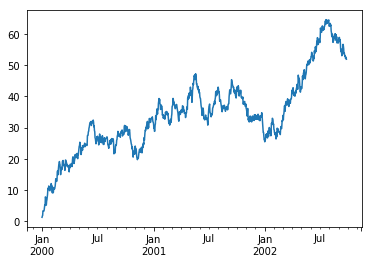

In [134]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:



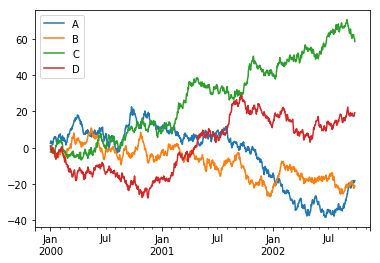

In [136]:
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
 
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

###Getting Data In/Out

#### CSV

Writing to a csv file.

In [137]:
df.to_csv('foo.csv')

In [138]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.371863,-0.791888,-2.413075,0.899091
1,2000-01-02,3.679521,0.113807,-1.961392,0.139691
2,2000-01-03,3.687521,-0.960967,-0.165741,-0.220894
3,2000-01-04,2.551812,0.446619,1.009639,-1.427183
4,2000-01-05,2.293811,-1.441786,0.919622,-0.806763
5,2000-01-06,2.294945,-2.103396,-0.170356,-2.713682
6,2000-01-07,2.077246,-2.672350,-1.175030,-1.369998
7,2000-01-08,1.480270,-2.594410,-2.926472,-1.174316
8,2000-01-09,3.183671,-1.436102,-3.138908,-0.120239
9,2000-01-10,2.730857,-2.967760,-1.251549,-0.191955


#### HDF5

Reading and writing to HDFStores.

Writing to a HDF5 Store.
(May need to install module pytables, on Windows/Anaconda, open conda prompt, run "conda install -c conda-forge pytables")

In [142]:
df.to_hdf('foo.h5', 'df')

Reading from a HDF5 Store.

In [143]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,2.371863,-0.791888,-2.413075,0.899091
2000-01-02,3.679521,0.113807,-1.961392,0.139691
2000-01-03,3.687521,-0.960967,-0.165741,-0.220894
2000-01-04,2.551812,0.446619,1.009639,-1.427183
2000-01-05,2.293811,-1.441786,0.919622,-0.806763
2000-01-06,2.294945,-2.103396,-0.170356,-2.713682
2000-01-07,2.077246,-2.672350,-1.175030,-1.369998
2000-01-08,1.480270,-2.594410,-2.926472,-1.174316
2000-01-09,3.183671,-1.436102,-3.138908,-0.120239
2000-01-10,2.730857,-2.967760,-1.251549,-0.191955


#### Excel

Reading and writing to MS Excel.

(May need to instal module openpyxl)

Writing to an excel file.

In [145]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')


Reading from an excel file.

In [146]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,2.371863,-0.791888,-2.413075,0.899091
2000-01-02,3.679521,0.113807,-1.961392,0.139691
2000-01-03,3.687521,-0.960967,-0.165741,-0.220894
2000-01-04,2.551812,0.446619,1.009639,-1.427183
2000-01-05,2.293811,-1.441786,0.919622,-0.806763
2000-01-06,2.294945,-2.103396,-0.170356,-2.713682
2000-01-07,2.077246,-2.672350,-1.175030,-1.369998
2000-01-08,1.480270,-2.594410,-2.926472,-1.174316
2000-01-09,3.183671,-1.436102,-3.138908,-0.120239
2000-01-10,2.730857,-2.967760,-1.251549,-0.191955


### Gotchas

If you are attempting to perform an operation you might see an exception like:

In [147]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().